# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [36]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
print "\nBasic statistics of data\n", data.describe()

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

Basic statistics of data
               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.00

##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: PCA generates the features with largest variance. As the result, I expect it to find the combination of products that many people buy but the amounts differ a lot. For example, as small shops complain after the cancellation of morning delivery, I expect their business rely hevily on fresh products, while ordinary customers buy more storable, durable goods. If such difference is significant enough, we'll see some components correspond to fresh and storable goods respectively.

ICA is different. It focus on the independent factors. For example, if there are different types of customers, inside groups, they show similar purchasing behaviors, while different groups behave independently, then each group, if unique and large enough, will be identified as an independent component. 

###PCA

In [2]:
# Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The first two features have comparable significance while the rest are much less important. I'd choose the first two features because they're much more important than the rest.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The first dimenstion almost represents fresh products. Most people need fresh products but the needs of families and shops can differ a lot, which means large variance, i.e., significance.

The second dimenstion represents goods a bit more durable. Milk, grocery and frozen products are all widely needed, and it expected that faimilies and shops show different purchasing behaviour on them.

###ICA

In [3]:
# Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
data_centered = data - data.mean()
ica = FastICA()
ica.fit(data_centered)
# Print the independent components
print ica.components_ * 1000000 # Magnify to make numbers easy to read

[[ -0.38650686  -0.21954826  -0.60000387  -0.52196945   0.50944483
   18.09224289]
 [ -0.15380091  -9.84453145   5.81255169   0.36340965  -3.32302606
    6.05621804]
 [  0.20996868  -1.87998702   6.4619886    0.40660264  -0.8894844
   -1.47143512]
 [  0.2986332   -2.31495332 -12.03881594   1.46400644  28.20230734
    5.72983361]
 [ -3.97603212   0.8601665    0.63069499   0.67691169  -2.07484817
    1.03995843]
 [  0.86513273   0.14062634  -0.77389768 -11.1462295    0.55406232
    5.95226582]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: The 1st one is the most significant and easiest to identify. It mostly represents a stong independent desire of delicatessen. In other words, there're many cases that people buy delicatessen only.

Then is the 4th, which maily corresponds to people's regular demand of detergents and papers. They're goods usually purchased by themselves periodically, and more durable than food. It's reasonable that such demand is independent.

The last one corresponds to the demand of frozen food, which at the same time suppress the demand of delicatessen, or vice versa. They're somehow substitutional to each other.

The 3rd one roughly corresponds to the demand of grocery. It's interesting that people seem to buy less milk and delicatessen when they buy grocery.

The rest two are not that clear. The magnitudes of component are comparable.

The 2nd one roughly represents the behavior of buying milk, together with detergents and paper products, while with suppression on delicatessen and delicatessen.

The 5th one reveals people's demand of fresh, detergents and paper products, with suppresion on delicatessen.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: The main difference between K Means and GMM is that GMM is soft assignment, that is, rather then assign a point to a cluster, it gives the probablities a point belongs to different clusters. It helps us to see the transition between clusters better. Is the change smooth, or there is a clear boundary? 

Futhermore, they have different assumptions. GMM assumes each cluster is generated from Gaussian distribution. As purchasing behavior is a result of many different, probably independent factors, we expect it to be nearly Gaussian because of the central limit theorem.

There time and space complexity are similar. For time complexity, in each iteration, k-mean calculates distances to centroids of all points and compare, while GMM calculates a list of possibilities. The complexity is similar. This is confirmed below. For space complexity, GMM needs about k (the number of clusters) times of space to store possibilities.

Here, I think a soft boundary between customer segments is better, because we're not sure whether there are clear difference. GMM reduces the arbitrariness.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [3]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [37]:
# First we reduce the data to two dimensions using PCA to capture variation
# data = np.log(data) #Log transformation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [38]:
# Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
import time
n_clusters = 4
start = time.time()
clusters = KMeans(n_clusters=n_clusters).fit(reduced_data)
# clusters = GMM(n_components=n_clusters).fit(reduced_data)
end = time.time()
print "Done!\nTraining time (secs): {:.3f}".format(end - start)
print clusters

Done!
Training time (secs): 0.045
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [39]:
# Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
n_clusters = 4
start = time.time()
# clusters = KMeans(n_clusters=n_clusters).fit(reduced_data)
clusters = GMM(n_components=n_clusters).fit(reduced_data)
end = time.time()
print "Done!\nTraining time (secs): {:.3f}".format(end - start)
print clusters

Done!
Training time (secs): 0.059
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


The time complexities are similar.

In [40]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [41]:
# Find the centroids for KMeans or the cluster means for GMM 

# centroids = clusters.cluster_centers_ # For K Means
centroids = clusters.means_ # For GMM
print centroids

[[  2336.74338421  -6721.26945836]
 [ -9418.46902103  34454.41705257]
 [-15313.48033345  -3338.2980532 ]
 [  7182.42527042   5428.27138593]]


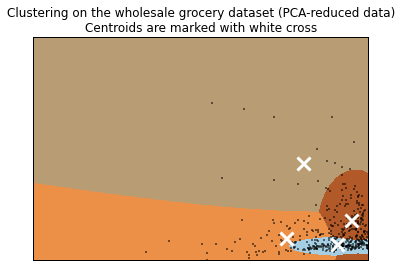

In [42]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [43]:
# Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
n_clusters = 3
# clusters = KMeans(n_clusters=n_clusters).fit(reduced_data)
clusters = GMM(n_components=n_clusters).fit(reduced_data)
print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


In [44]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [45]:
# Find the centroids for KMeans or the cluster means for GMM 

# centroids = clusters.cluster_centers_ # For K Means
centroids = clusters.means_ # For GMM
print centroids

[[  7007.45427668   4294.01360677]
 [   313.48539412  -6497.20521133]
 [-17858.6536729   10050.33930164]]


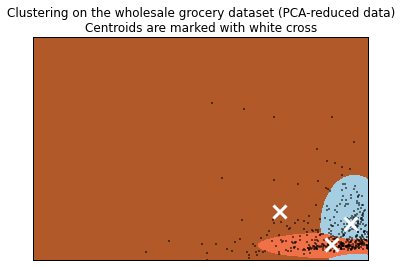

In [46]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [47]:
# Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
n_clusters = 2
# clusters = KMeans(n_clusters=n_clusters).fit(reduced_data)
clusters = GMM(n_components=n_clusters).fit(reduced_data)
print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


In [48]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [49]:
# Find the centroids for KMeans or the cluster means for GMM 

# centroids = clusters.cluster_centers_ # For K Means
centroids = clusters.means_ # For GMM
print centroids

[[-10810.23008886   9858.15532401]
 [  3308.39301792  -3017.01739698]]


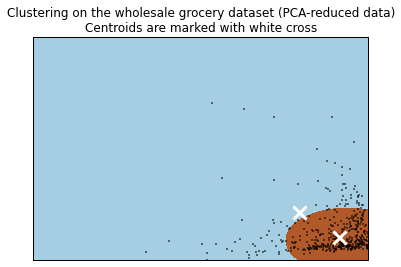

In [50]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Observing the distribution of data, I see that there are crowd of points at the bottom right corner, which intuitively, don't show further fine structure. As the result, I arugue that they should be assigned to one cluster. The rest may be classified to two parts, one on the left of and one above the first cluster. However, that's not the assignment we got in 3-clusters case above, so I would argue n_clusters=2 agrees best to the intuition.

**7)** What are the central objects in each cluster? Describe them as customers.

In [51]:
pca.inverse_transform(centroids)

array([[ 21466.4371414 ,  12191.15139458,  16154.15158614,   4534.44968674,
          6406.92050793,   2823.79379221],
       [  9103.25397456,   3839.15728914,   5440.84670074,   2624.33876372,
          1802.56155363,   1127.34432737]])

In [55]:
pred = list(clusters.predict(reduced_data))
print '{} points in cluster 1. {} points in cluster 2.'.format(pred.count(0), pred.count(1))

90 points in cluster 1. 350 points in cluster 2.


Answer: Looking at the controids, we infer that the first centroid correpsonds to small family shops, as they purchase much more products (so they complain when the morning delivery was cancelled), but are outnumbered by the second cluster (that's why their issues were washed out statistically). The second centroid corresponds to common customers, who purchase fewer products.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: To me, PCA and ICA give different insight. I'd argue ICA fits more naturally with the dasta. 

As discussed at the beginning, PCA gives the insight that what most people buy but with different amounts. This is important and useful. It gives us the direction to look at. By using PCA, first we know what people are interested in, then where they vary, but we still can't find the reason why there're unexpected customers' complaints. This is where ICA comes in, it gives us the power to analyze independent customer segements and their behaviors. Combined PCA and ICA, we finally get deeper understanding of the data.

**9)** How would you use that technique to help the company design new experiments?

Answer: With customer segments, we can now carry out tests segment-wise to eliminate confounding effects. For example, to test the effect of delivery policy change, we split each segment to control/experiment groups, on the common customer segment, we won't see statistical difference, but in family shop segment, I expect more complaints in the experiment group than in the control group.

**10)** How would you use that data to help you predict future customer needs?

Answer: As we have found two customer segments and their characteristic behaviors. We can use supervised learning to train a model. The input features are the ones we use in clustering above, and the label is whether a customer runs family shop. For any future customer, after collecting his/her purchasing pattern (what stuff s/he buys, and how many) for a while, we can use the model to decide which segment s/he belongs to, then design specific selling policy.